In [1]:
import numpy as np
import control as co
import matplotlib.pyplot as plt
import sympy as sym
import ipywidgets
from ipywidgets import interact

In [2]:
sym.init_printing()

## 4.4 Second-Order Systems: Introduction
Let us now extend the concepts of poles and zeros and transient response to secondorder
systems. Compared to the simplicity of a first-order system, a second-order
system exhibits a wide range of responses that must be analyzed and described.
Whereas varying a first-order system's parameter simply changes the speed of the
response, changes in the parameters of a second-order system can change the form of
the response.
Let general second-order system without no zeros is $$G(s)=\dfrac{b}{s^2+as+b}$$
Now the step response $$C(s)=R(s)G(s)=\dfrac{b}{s(s^2+as+b)}$$

### Overdamped Response
A step response of a second‐order system that is characterized by
no overshoot


For this response $$C(s)=\dfrac{9}{s(s^2+9s+9)}=\dfrac{9}{s (s + 7.854) (s + 1.146)}$$
This function has a pole at the origin that comes from the unit step input and two real
poles that come from the system. The input pole at the origin generates the constant
forced response; each of the two system poles on the real axis generates an exponential
natural response whose exponential frequency is equal to the pole location. Hence, the
output initially could have been written as $$c(t) = K_1 + K_2e^{−7.854t} + K_3e^{−1.146t}$$. This
response, shown in Figure below, is called overdamped

In [3]:
s=co.tf("s")
G=9/(s**2+9*s+9)
C=9/(s*(s**2+9*s+9))
poles=np.around(C.pole(), 2)
poles

array([-7.85, -1.15,  0.  ])

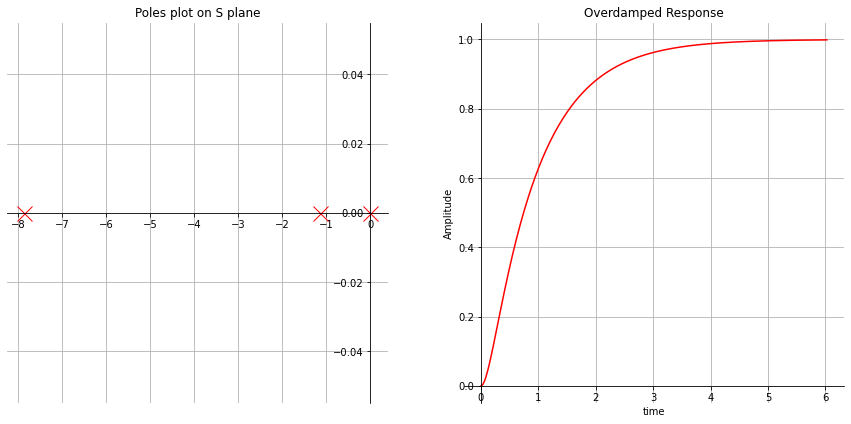

In [4]:
%matplotlib inline
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,7))

ax[0].plot(poles.real, poles.imag, 
           marker="x", 
           color="red", 
           linestyle="none", 
           markersize=15)
def spine_origin(axes_index, xlabel, ylabel, title):
    #move left y axis and bottom x axis to center (0,0)
    ax[axes_index].spines["left"].set_position(("data",0))
    ax[axes_index].spines["bottom"].set_position(("data", 0))
    #Eliminate upper and right axes
    ax[axes_index].spines["right"].set_visible(False)
    ax[axes_index].spines["top"].set_visible(False)
    ax[axes_index].set_xlabel(xlabel)
    ax[axes_index].set_ylabel(ylabel)
    ax[axes_index].set_title(title)
spine_origin(0, None, None, "Poles plot on S plane")
ax[0].grid()

#Step Response
t, y = co.step_response(G) # calculate the step response of G1
ax[1].plot(t, y, color="red")
spine_origin(1, "time", "Amplitude", "Overdamped Response")
ax[1].grid()

### Underdamped Response
The step response of a second‐order system that is characterized by
overshoot.


For this response $$C(s)=\dfrac {9}{s(s^2+2s+9)}$$
This function has a pole at the origin that comes from the unit step input and two
complex poles that come from the system.

In [5]:
s=sym.symbols("s")
t=sym.symbols("t", real=True)
system_poles=sym.solveset(s**2+2*s+9, s)
system_poles

In [6]:
C=9/(s*(s**2+2*s+9))
partial_fraction=C.apart(s)
c_time_domain=sym.inverse_laplace_transform(partial_fraction, s, t)
c_time_domain

So$$
\begin{equation}
c(t)=1-e^{-t}\left[\cos (2\sqrt{2}t)+\dfrac{\sqrt{2}}{4}\sin(2\sqrt{2}t)\right]
\label{eq: second-order-system}
\tag{3}
\end{equation}
$$
We now compare the response of the second-order system to the poles that generated it. First we will compare the pole location to the time function, and then we will compare the pole location to the plot. From above code, the poles that generate the natural response are at $s = −1 \pm j2\sqrt{2}$.Comparing these values to equation (3), we see that the real part of the pole matches the exponential decay frequency of the sinusoid's amplitude, while the imaginary part of the pole matches the frequency of the sinusoidal oscillation.


The transient response consists of an
exponentially decaying amplitude generated by the real part of the system pole times a sinusoidal waveform generated by the imaginary part of the system pole. The time constant of the exponential decay is equal to the reciprocal of the real part of the system pole. The value of the imaginary part is the actual frequency of the sinusoid. This sinusoidal frequency is given the name damped frequency of oscillation, $ω_d$. Finally, the steady-state response (unit step) was generated by the input pole located at the origin. We call the type of response an underdamped response, one which approaches a steady-state value via a transient response that is a damped oscillation.

In [7]:
s=co.tf("s")
G=9/(s**2+2*s+9)
C=9/(s*(s**2+2*s+9))
poles=np.around(C.pole(), 2)
poles

array([-1.+2.83j, -1.-2.83j,  0.+0.j  ])

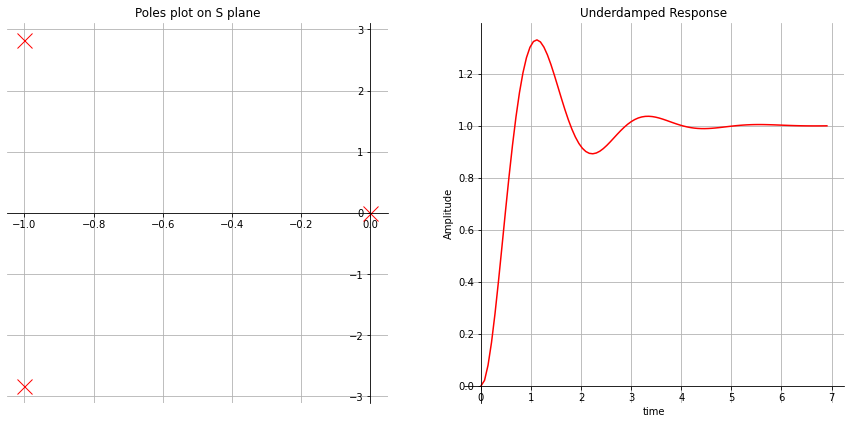

In [8]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,7))
ax[0].plot(poles.real, poles.imag, 
           marker="x", 
           color="red", 
           linestyle="none", 
           markersize=15)
def spine_origin(axes_index, xlabel, ylabel, title):
    #move left y axis and bottom x axis to center (0,0)
    ax[axes_index].spines["left"].set_position(("data",0))
    ax[axes_index].spines["bottom"].set_position(("data", 0))
    #Eliminate upper and right axes
    ax[axes_index].spines["right"].set_visible(False)
    ax[axes_index].spines["top"].set_visible(False)
    ax[axes_index].set_xlabel(xlabel)
    ax[axes_index].set_ylabel(ylabel)
    ax[axes_index].set_title(title)
spine_origin(0, None, None, "Poles plot on S plane")
ax[0].grid()

#Step Response
#t=np.arange(0, 10, 0.1)
t, y = co.step_response(G) # calculate the step response of G1
ax[1].plot(t, y, color="red")
spine_origin(1, "time", "Amplitude", "Underdamped Response")
ax[1].grid()

### Undamped Response
For this response, $$C(s)=\dfrac{9}{s(s^2+9)}$$
This function has a pole at the origin that comes from the unit step input and two
imaginary poles that come from the system. The input pole at the origin generates the
constant forced response, and the two system poles on the imaginary axis at $\pm j3$
generate a sinusoidal natural response whose frequency is equal to the location of the
imaginary poles. Hence, the output can be estimated as $$c(t) = K_1 + K_4 cos(3t − \phi)$$ This
type of response, shown in Figure below, is called undamped. Note that the absence of
a real part in the pole pair corresponds to an exponential that does not decay.
Mathematically, the exponential is $e^{−0t} = 1$.

In [9]:
s=co.tf("s")
G=9/(s**2+9)
C=9/(s*(s**2+9))
poles=np.around(C.pole(),2)
poles

array([-0.+3.j,  0.-3.j,  0.+0.j])

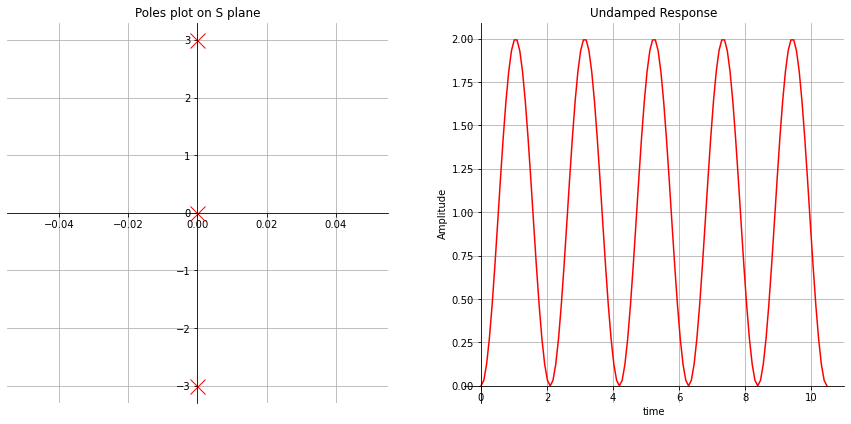

In [10]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,7))
ax[0].plot(poles.real, poles.imag, 
           marker="x", 
           color="red", 
           linestyle="none", 
           markersize=15)
def spine_origin(axes_index, xlabel, ylabel, title):
    #move left y axis and bottom x axis to center (0,0)
    ax[axes_index].spines["left"].set_position(("data",0))
    ax[axes_index].spines["bottom"].set_position(("data", 0))
    #Eliminate upper and right axes
    ax[axes_index].spines["right"].set_visible(False)
    ax[axes_index].spines["top"].set_visible(False)
    ax[axes_index].set_xlabel(xlabel)
    ax[axes_index].set_ylabel(ylabel)
    ax[axes_index].set_title(title)
spine_origin(0, None, None, "Poles plot on S plane")
ax[0].grid()

#Step Response
#t=np.arange(0, 10, 0.1)
t, y = co.step_response(G) # calculate the step response of G1
ax[1].plot(t, y, color="red")
spine_origin(1, "time", "Amplitude", "Undamped Response")
ax[1].grid()

### Critically Damped Response
The step response of a second‐order system with a given natural
frequency that is characterized by no overshoot and a rise time that
is faster than any possible overdamped response with the same
natural frequency.


For this response, $$C(s)=\dfrac {9}{s(s^2+6s+9)}=\dfrac{9}{s(s+3)^2}$$
This function has a pole at the origin that comes from the unit step input and two
multiple real poles that come from the system. The input pole at the origin generates
the constant forced response, and the two poles on the real axis at −3 generate a
natural response consisting of an exponential and an exponential multiplied by time,
where the exponential frequency is equal to the location of the real poles. Hence, the
output can be estimated as $$c(t) = K_1 + K_2e^{−3t} + K_3te^{−3t}$$ This type of response, shown
in Figure below, is called critically damped. Critically damped responses are the
fastest possible without the overshoot that is characteristic of the underdamped response.

In [11]:
s=co.tf("s")
G=9/(s**2+6*s+9)
C=9/(s*(s**2+6*s+9))
poles=np.around(C.pole(), 2)
poles

array([-3.+0.j, -3.-0.j,  0.+0.j])

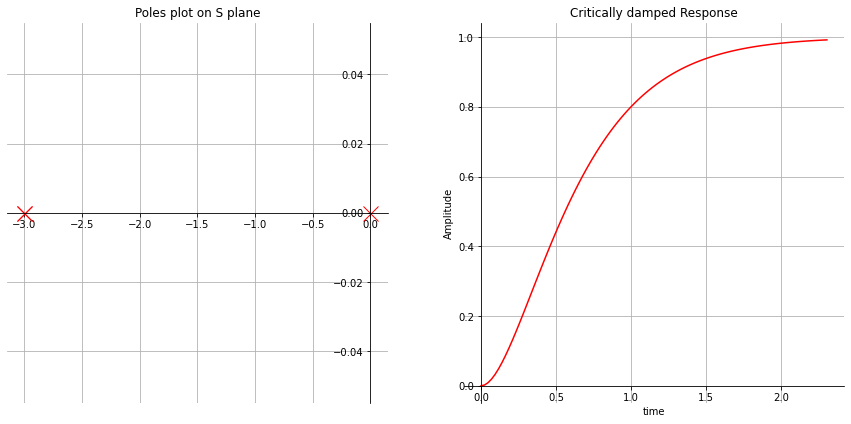

In [12]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,7))
ax[0].plot(poles.real, poles.imag, 
           marker="x", 
           color="red", 
           linestyle="none", 
           markersize=15)
def spine_origin(axes_index, xlabel, ylabel, title):
    #move left y axis and bottom x axis to center (0,0)
    ax[axes_index].spines["left"].set_position(("data",0))
    ax[axes_index].spines["bottom"].set_position(("data", 0))
    #Eliminate upper and right axes
    ax[axes_index].spines["right"].set_visible(False)
    ax[axes_index].spines["top"].set_visible(False)
    ax[axes_index].set_xlabel(xlabel)
    ax[axes_index].set_ylabel(ylabel)
    ax[axes_index].set_title(title)
spine_origin(0, None, None, "Poles plot on S plane")
ax[0].grid()

#Step Response
#t=np.arange(0, 10, 0.1)
t, y = co.step_response(G) # calculate the step response of G1
ax[1].plot(t, y, color="red")
spine_origin(1, "time", "Amplitude", "Critically damped Response")
ax[1].grid()

### Second-order system, pole plot and step response (At a glance) 
<img src="https://github.com/sayedul79/python-control-system/blob/main/image/4.7.png?raw=true"/>

### Key point of Overdamed, Underdamped, Critically damped response

**Overdamped response**
1. Poles: Two real at $−\sigma_1$, $−\sigma_2$<br> 
2. Natural response: Two exponentials with time constants equal to the reciprocal of the pole locations, or $$c(t) = K_1e^{−σ_1t} + K_2e^{−σ_2t}$$

**Underdamped response**
1. Poles: Two complex at $−\sigma_d \pm j\omega_d$
2. Natural response: Damped sinusoid with an exponential envelope whose time constant is equal to the reciprocal of the pole's real part. The radian frequency of the sinusoid, the damped frequency of oscillation, is equal to the imaginary part of the poles, or $$
c(t) = Ae^{−\sigma_d t} \cos (\omega_d t − \phi)$$

**Undamped responses**
1. Poles: Two imaginary at $\pm j\omega_1$
2. Natural response: Undamped sinusoid with radian frequency equal to the imaginary part of the poles, or $$c(t) = A \cos (\omega_1t − \phi)$$

**Critically damped responses**
1. Poles: Two real at $−\sigma_1$
2. Natural response: One term is an exponential whose time constant is equal to the reciprocal of the pole location. Another term is the product of time, t, and an exponential with time constant equal to the reciprocal of the pole location, or $$c(t) = K_1e^{−\sigma_1t} + K_2te^{−\sigma_1t}$$

## 4.5 The General Second-Order System
Now that we have become familiar with second-order systems and their responses, we
generalize the discussion and establish quantitative specifications defined in such a
way that the response of a second-order system can be described to a designer without
the need for sketching the response. In this section, we define two physically
meaningful specifications for second-order systems. These quantities can be used to
describe the characteristics of the second-order transient response just as time
constants describe the first-order system response. The two quantities are called
natural frequency and damping ratio.  

### Natural frequency, $\omega_n$
The frequency of oscillation of a system if all the damping is
removed.

For example, the frequency of oscillation of a series RLC
circuit with the resistance shorted would be the natural frequency.

### Damping Ratio, ζ
A viable definition for this quantity is one that compares the exponential decay
frequency of the envelope to the natural frequency. This ratio is constant regardless of
the time scale of the response. Also, the reciprocal, which is proportional to the ratio of
the natural period to the exponential time constant, remains the same regardless of
the time base.


$$\zeta=\frac{\text{Exponential decay frequency}}{\text{Natural frequency (rad/s)}}=\dfrac{1}{2\pi}\times \dfrac{\text{Natural period (seconds)}}{\text{Exponential time constant}}$$


### New form of second-order system
The general second-order system shown can be
transformed to show the quantities $\zeta$ and $\omega_n$. Consider the general system $$
G(s)=\dfrac{b}{s^2+as+b}
\label{general second order}
\tag{1}
$$
Without damping, the poles would be on the jω-axis, and the response would be an undamped sinusoid. For the poles to be purely imaginary, a = 0. Hence equation \eqref{general second order} would be
$$G(s)=\dfrac{b}{s^2+b}$$
By definition, the natural frequency, ωn, is the frequency of oscillation of this system.
Since the poles of this system are on the jω-axis at $\pm j\sqrt{b}$,
$$\omega_n = \sqrt{b}$$
Hence,
$$b=\omega_n^2$$
Roots of the characteristic quation \eqref{general second order} is :
$$
\begin{eqnarray}
&s^2&+as+b=0\\
\Rightarrow &s&=\dfrac{-a\pm \sqrt{a^2-4b}}{2}\\
\Rightarrow &s&=\dfrac{-a}{2}\pm \dfrac{\sqrt{a^2-4b}}{2}
\end{eqnarray}
$$
Assuming an underdamped system, the complex
poles have a real part, $\sigma$, equal to −a/2. The magnitude of this value is then the
exponential decay frequency. Hence,


$$\zeta=\frac{\text{Exponential decay frequency}}{\text{Natural frequency (rad/s)}}=\dfrac{|\sigma|}{\omega_n}=\dfrac{a/2}{\omega_n}$$
from which
$$a = 2\zeta \omega_n$$
Now substitute value $a$ and $b$ in equation \eqref{general second order}
$$
G(s)=\dfrac{\omega_n^2}{s^2+2\zeta \omega_n s+\omega_n^2}
\label{second order with zeta omega}
\tag{3}
$$

In [13]:
#second-order system response for different zeta and omega
def system_response(zeta, omega):
    s=co.tf("s")
    G=omega**2/(s**2+2*zeta*omega*s+omega**2)
    C=G*(1/s) #system output for input step function
    fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,7))
    #pole-zero plot
    poles=np.around(C.pole())
    ax[0].plot(poles.real, poles.imag, marker="x",
              markersize=15, 
              color="blue", 
              linestyle="none")
    #move axis to center
    def spine_origin(axes_index, xlabel, ylabel, title):
        #move left y axis and bottom x axis to center (0,0)
        ax[axes_index].spines["left"].set_position(("data",0))
        ax[axes_index].spines["bottom"].set_position(("data", 0))
        #Eliminate upper and right axes
        ax[axes_index].spines["right"].set_visible(False)
        ax[axes_index].spines["top"].set_visible(False)
        ax[axes_index].set_xlabel(xlabel)
        ax[axes_index].set_ylabel(ylabel)
        ax[axes_index].set_title(title)
    spine_origin(0, None, None, "Poles plot on S plane")
    ax[0].grid()
    #step response plot
    t, y=co.step_response(G)
    ax[1].plot(t, y, color="blue")
    ax[1].grid()
    spine_origin(1, "time", "amplitude", 
                 "Second-order system step response")
interact(system_response, zeta=(0, 2, 0.1), omega=(6,10,1))

interactive(children=(FloatSlider(value=1.0, description='zeta', max=2.0), IntSlider(value=8, description='ome…

<function __main__.system_response(zeta, omega)>

Roots of charactaristic equation of $G(s)$ is:
$$
\begin{eqnarray}
&s^2&+2\zeta \omega_n s+\omega_n^2=0 \\
\Rightarrow &s_{1,2}&=\dfrac{-2\zeta \omega_n \pm \sqrt{(2\zeta \omega_n)^2 -4\omega_n^2}}{2}\\
\Rightarrow &s_{1,2}&=\dfrac{-2\zeta \omega_n \pm \sqrt{4\zeta^2 \omega_n^2 -4\omega_n^2}}{2}\\
\Rightarrow &s_{1,2}&=\dfrac{-2\zeta \omega_n \pm 2\omega_n \sqrt{\zeta^2 -1}}{2}\\
\Rightarrow &s_{1,2}&=-\zeta \omega_n \pm \omega_n \sqrt{\zeta^2-1}
\label{pole of second order system}
\tag{4}
\end{eqnarray}
$$
From Eq. \eqref{pole of second order system}, we see that the various cases of second-order response are a function of $\zeta$<br>

|damping $\zeta$|  Poles of G(s) | c(t) Response Classification |
|:---------------:|  :----------------------------:| :---------------------------------------------------------: | 
|$\zeta=0$       | $s_{1,2}=\pm j\omega_n$ | Undamped (marginally stable) | 
|$\zeta=1$       | $s_{1,2}=-\omega_n$ | Critically damped | 
|$0< \zeta <1$   | $s_{1,2}=-\zeta \omega_n \pm j\sqrt{1-\zeta^2}$ | Undamped (marginally stable) | 

### Second-order response as a function of damping ratio
<img src="https://github.com/sayedul79/python-control-system/blob/main/image/4.11.png?raw=true">

This above section (4.5) defined two specifications, or parameters, of second-order systems:
natural frequency, ωn, and damping ratio, $\zeta$. We saw that the nature of the response
obtained was related to the value of $\zeta$. Variations of damping ratio alone yield the
complete range of overdamped, critically damped, underdamped, and undamped
responses.

### 4.6 Underdamped Second-Order Systems
Let us begin by finding the step response for the general second-order system. The transform of the response, C(s), is the transform of the input times the transfer function, or
$$
\begin{eqnarray}
C(s)&=&\dfrac{\omega_n^2}{s(s^2+2\zeta \omega_n s+\omega_n^2)}\\
&=&\dfrac{1}{s}\times \dfrac{\omega_n^2}{s^2+2\zeta \omega_ns+\zeta^2\omega_n^2+\omega_n^2-\zeta^2\omega_n^2}\\
&=&\dfrac{1}{s}\times \dfrac{\omega_n^2}{\left(s+\zeta\omega_n\right)^2+\left(1-\zeta^2\right)\omega_n^2}\\
&=&\dfrac{1}{s}\times \dfrac{\omega_n^2}{\left(s+\zeta\omega_n\right)^2+\left(\sqrt{1-\zeta^2}\omega_n\right)^2}
\end{eqnarray}
$$


If $\sigma=\zeta\omega_n$ and $\omega_d=(\sqrt{1-\zeta^2})\omega_n$ then 
$$C(s)=\dfrac{1}{s}\times \dfrac{\omega_n^2}{(s+\sigma)^2+\omega_d^2}$$
Now we perform partial fraction expansion of $C(s)$:
$$
\begin{eqnarray}
\dfrac{1}{s}\times \dfrac{\omega_n^2}{(s+\sigma)^2+\omega_d^2} & \equiv&\dfrac{K_1}{s}+\dfrac{K_2s+K_3}{(s+\sigma)^2+\omega_d^2}\\
\end{eqnarray}
$$
Multiply both side by $s\{(s+\sigma)^2+\omega_d^2\}$
$$
\begin{eqnarray}
&K_1&\{(s+\sigma)^2+\omega_d^2\}+s(K_2s+K_3) \equiv \omega_n^2\\
\Rightarrow &K_1&(s^2+2s\sigma +\sigma^2)+K_1\omega_d^2+K_2s^2+K_3s \equiv \omega_n^2 \\
\Rightarrow &(K_1&+K_2)s^2+(2K_1\sigma+K_3)s+(K_1\sigma^2+K_1\omega_d^2)s^0 \equiv \omega_n^2s^0
\end{eqnarray}
$$
Equating co-efficient of both side we find
$$
\begin{eqnarray}
&K_1&\sigma^2+K_1\omega_d^2=\omega_n^2 \\
\Rightarrow&K_1&=\dfrac{\omega_n^2}{\sigma^2+\omega_d^2}\\
\Rightarrow &K_1&=\dfrac{\omega_n^2}{\zeta^2\omega_n^2+\omega_n^2(1-\zeta^2)}\\
\Rightarrow &K_1&=\dfrac{\omega_n^2}{\omega_n^2}=1
\end{eqnarray}
$$
And $$
\begin{eqnarray}
&K_1&+K_2=0 \\
\Rightarrow &K_2&=-K_1 \\
\Rightarrow &K_2&=-1
\end{eqnarray}
$$
And $$
2K_1\sigma +K_3=0 \Rightarrow K_3=-2\sigma
$$
Now $$
\begin{eqnarray}
C(s)&=&\dfrac{K_1}{s}+\dfrac{K_2s+K_3}{(s+\sigma)^2+\omega_d^2}\\
&=&\dfrac{1}{s}-\dfrac{s+2\sigma}{(s+\sigma)^2+\omega_d^2}\\
&=&\dfrac{1}{s}-\dfrac{(s+\sigma)+\sigma}{(s+\sigma)^2+\omega_d^2}\\
&=&\dfrac{1}{s}-\dfrac{s+\sigma}{(s+\sigma)^2+\omega_d^2}-\dfrac{\sigma}{(s+\sigma)^2+\omega_d^2}\\
&=&\dfrac{1}{s}-\dfrac{s+\sigma}{(s+\sigma)^2+\omega_d^2}-\dfrac{\sigma}{\omega_d}\times \dfrac{\omega_d}{(s+\sigma)^2+\omega_d^2}\\
\end{eqnarray}
$$
By doing inverse laplace transform of $C(s)$:
<img src="https://github.com/sayedul79/python-control-system/blob/main/image/1-underdamped-response.jpg?raw=true">

### Evaluation of %OS
$$\% OS=exp{\left(\dfrac{-\zeta \pi}{\sqrt{1-\zeta^2}}\right)}\times 100$$

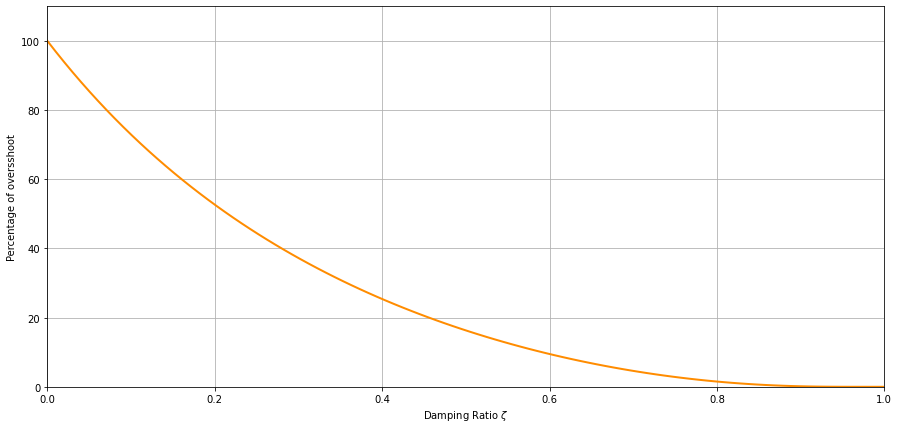

In [13]:
zeta = np.linspace(0,0.999,100)
os = np.exp(-np.pi*zeta/np.sqrt(1-zeta**2))*100
fig, ax=plt.subplots(figsize=(15,7))
ax.plot(zeta, os, linewidth=2, color="DarkOrange")
ax.set_xlim(0,1)
ax.set_ylim(0,110)
ax.set_xlabel("Damping Ratio $\zeta$")
ax.set_ylabel("Percentage of oversshoot")
ax.grid()